pr107_NNHOnly

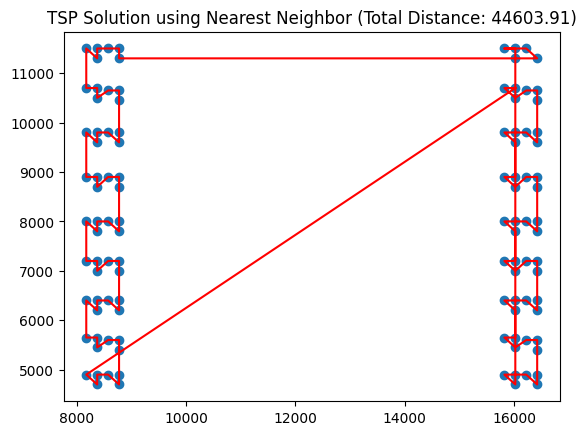

Time taken to render: 0.319690465927124 seconds




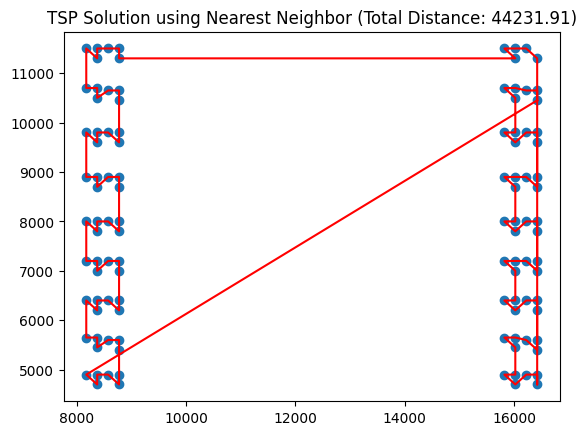

Time taken to render: 0.3339085578918457 seconds




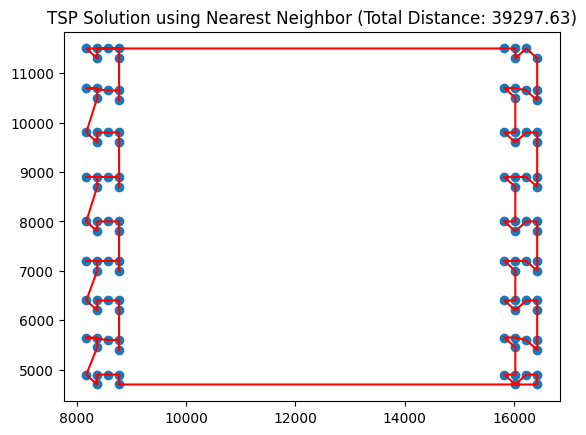

Time taken to render: 0.20627236366271973 seconds




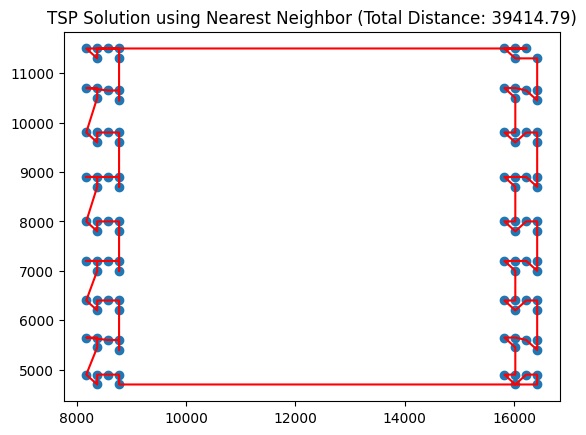

Time taken to render: 0.2077007293701172 seconds




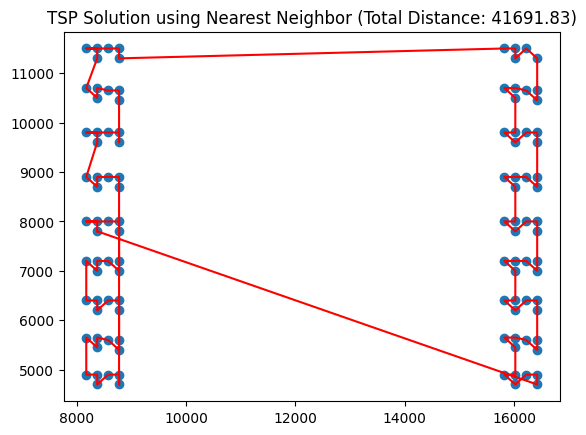

Time taken to render: 0.2026205062866211 seconds




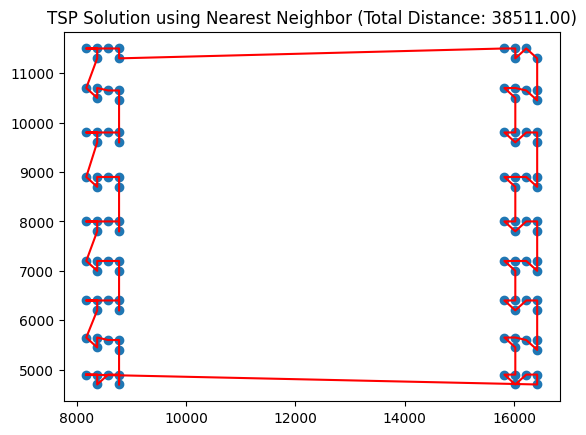

Time taken to render: 0.2017369270324707 seconds




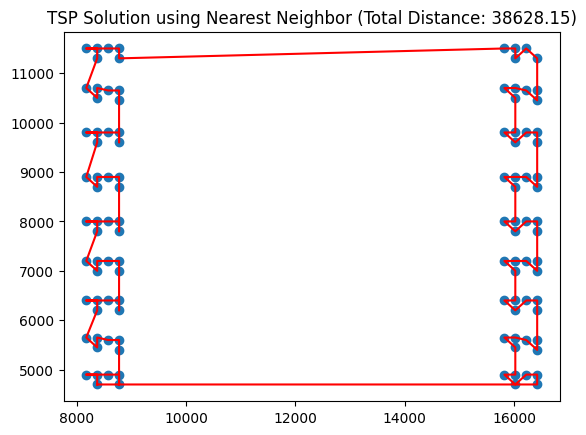

Time taken to render: 0.21412086486816406 seconds




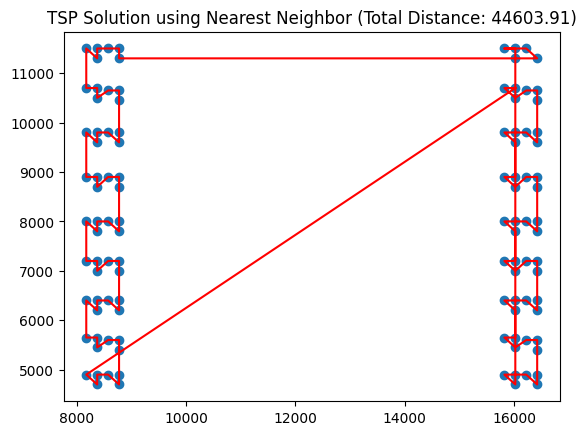

Time taken to render: 0.16954708099365234 seconds




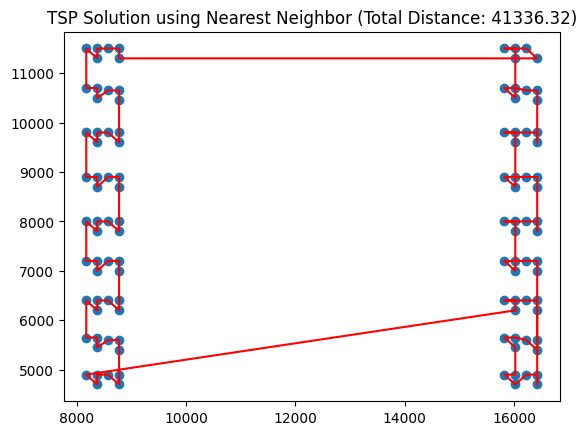

Time taken to render: 0.18371057510375977 seconds




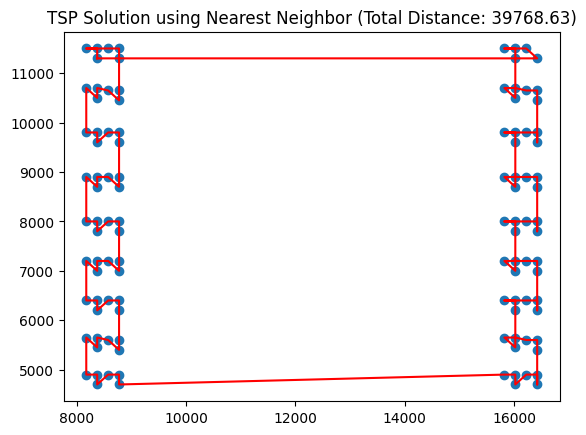

Time taken to render: 0.1990184783935547 seconds


Average Tour Length: 41208.80811714238
Time taken to render: 0.1990184783935547 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "pr107.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


pr107_NNHWith2OPT

Iteration 3682: Improved total distance to 39939.59
Iteration 4342: Improved total distance to 39895.26
Iteration 4621: Improved total distance to 39739.10
Iteration 5071: Improved total distance to 39621.95
Iteration 5377: Improved total distance to 39504.79
Iteration 5539: Improved total distance to 39348.64


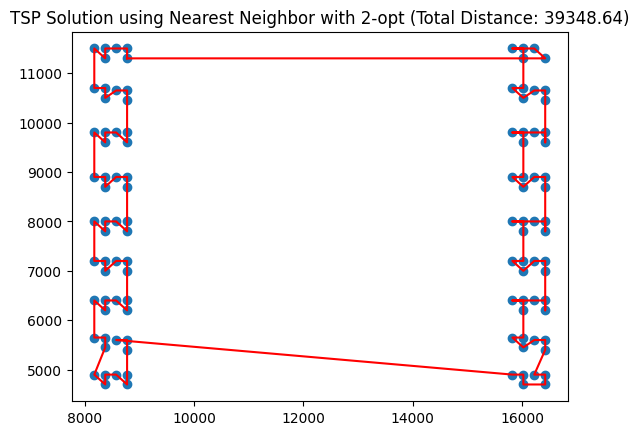

Time taken to render: 9.485215187072754 seconds


Iteration 16: Improved total distance to 40374.28
Iteration 1381: Improved total distance to 40301.70
Iteration 5566: Improved total distance to 40207.13
Iteration 5570: Improved total distance to 39859.53
Iteration 5577: Improved total distance to 39585.73
Iteration 5580: Improved total distance to 39537.21
Iteration 11130: Improved total distance to 39311.00


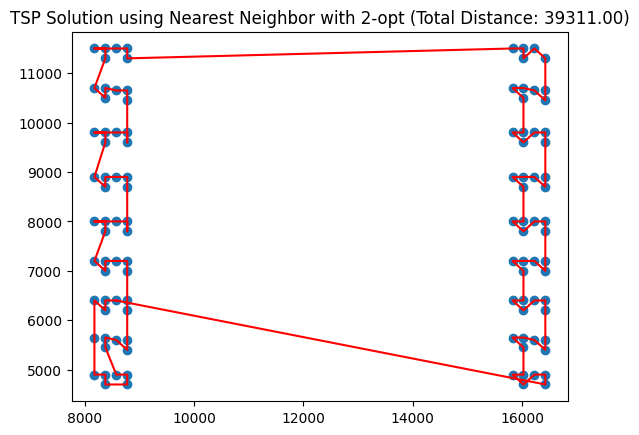

Time taken to render: 39.91617012023926 seconds


Iteration 211: Improved total distance to 39926.31
Iteration 814: Improved total distance to 39770.16
Iteration 1912: Improved total distance to 39653.00
Iteration 2866: Improved total distance to 39535.84
Iteration 3676: Improved total distance to 39379.69
Iteration 3858: Improved total distance to 39100.80
Iteration 3971: Improved total distance to 38786.47


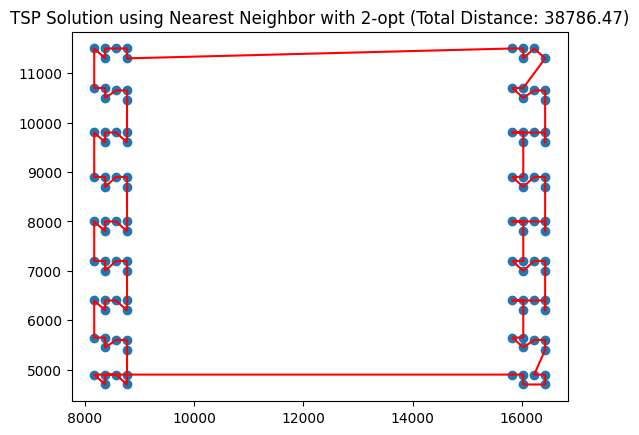

Time taken to render: 18.301211833953857 seconds


Iteration 40: Improved total distance to 43393.52
Iteration 51: Improved total distance to 42331.43
Iteration 517: Improved total distance to 42175.28
Iteration 3495: Improved total distance to 42155.72
Iteration 4187: Improved total distance to 40807.74
Iteration 5571: Improved total distance to 40522.70
Iteration 5575: Improved total distance to 40265.83
Iteration 9051: Improved total distance to 40148.67
Iteration 9057: Improved total distance to 39904.83
Iteration 9701: Improved total distance to 39856.45
Iteration 9702: Improved total distance to 39681.48
Iteration 9755: Improved total distance to 39530.05


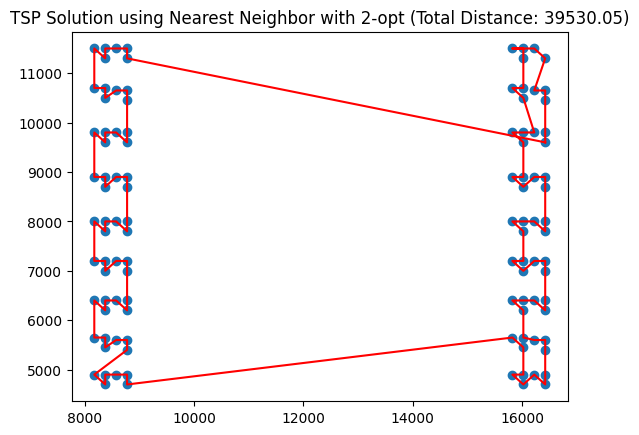

Time taken to render: 30.071464776992798 seconds


Iteration 34: Improved total distance to 42430.34
Iteration 3289: Improved total distance to 42313.18
Iteration 5566: Improved total distance to 42235.60
Iteration 5571: Improved total distance to 42115.00
Iteration 5577: Improved total distance to 41956.54
Iteration 5584: Improved total distance to 41833.58
Iteration 5589: Improved total distance to 41605.79
Iteration 6378: Improved total distance to 41571.21
Iteration 6385: Improved total distance to 41512.45
Iteration 7390: Improved total distance to 41412.45
Iteration 11947: Improved total distance to 41152.41


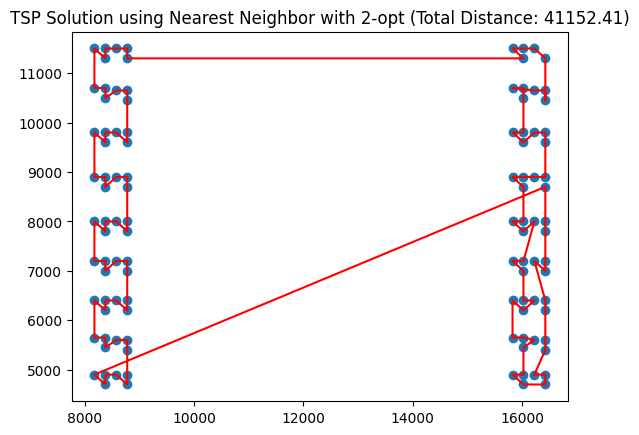

Time taken to render: 41.05802655220032 seconds


Average Tour Length: 39625.7134930094
Time taken to render: 41.05802655220032 seconds


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "pr107.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(5):
    start_time = time.time()  # Start timing for this run
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


pr107_NNHWith3OPT

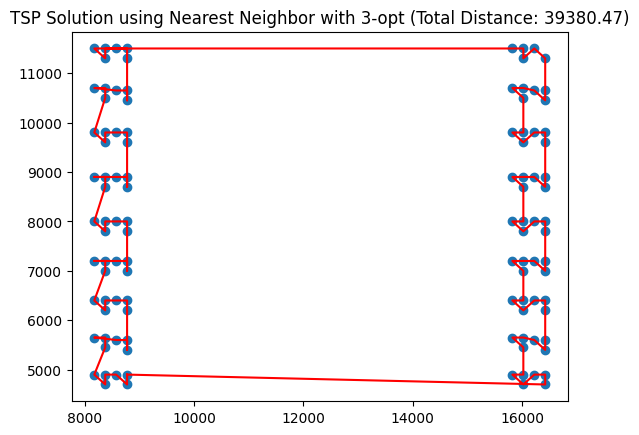

Time taken to render: 20.48019289970398 seconds


Iteration 1202: Improved total distance to 42056.52
Iteration 127900: Improved total distance to 41965.36
Iteration 135072: Improved total distance to 41694.49
Iteration 324806: Improved total distance to 41673.74
Iteration 327208: Improved total distance to 40752.11
Iteration 502811: Improved total distance to 40739.75
Iteration 687646: Improved total distance to 40720.55
Iteration 713913: Improved total distance to 40368.83


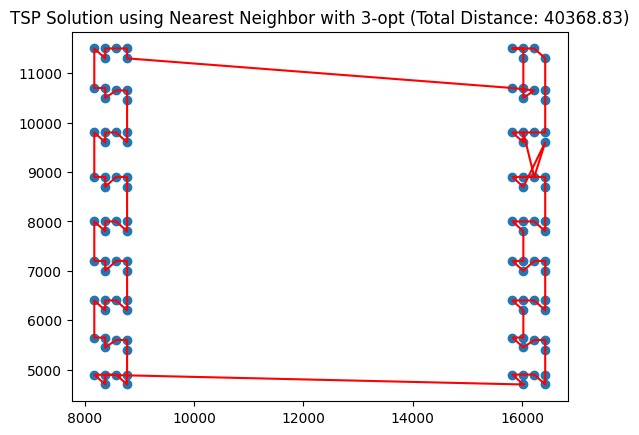

Time taken to render: 78.93036079406738 seconds




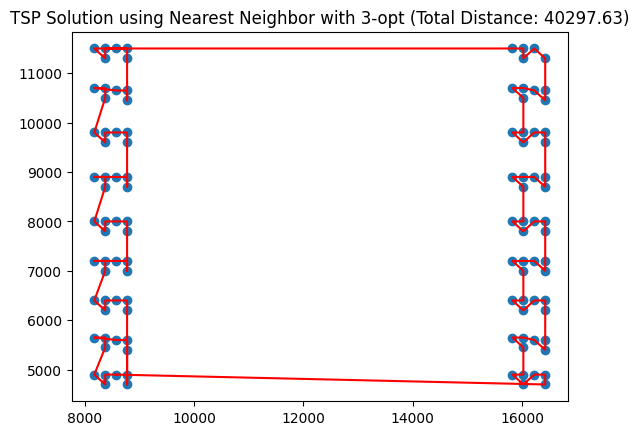

Time taken to render: 15.218198537826538 seconds


Average Tour Length: 40015.64583671746
Time taken to render: 15.219229698181152 seconds


In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "pr107.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances for three runs
total_distances = []
render_times = []

for i in range(3):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")
